# Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from sklearn.model_selection import train_test_split

%reload_ext autoreload
%autoreload 2

# Part One

In [2]:
def plot_phase_portrait(A, X, Y, title, sol):
    """
    Plots a linear vector field in a streamplot, defined with X and Y coordinates and the matrix A.
    """
    UV = A @ np.row_stack([X.ravel(), Y.ravel()])
    U = UV[0, :].reshape(X.shape)
    V = UV[1, :].reshape(X.shape)

    fig = plt.figure(figsize=(15, 15))

    #  Varying density along a streamline
    ax0 = fig.add_subplot()
    ax0.streamplot(X, Y, U, V, density=[0.5, 1])
    ax0.plot(sol.y[0], sol.y[1])
    ax0.set_title(title)
    ax0.set_aspect(1)
    return ax0

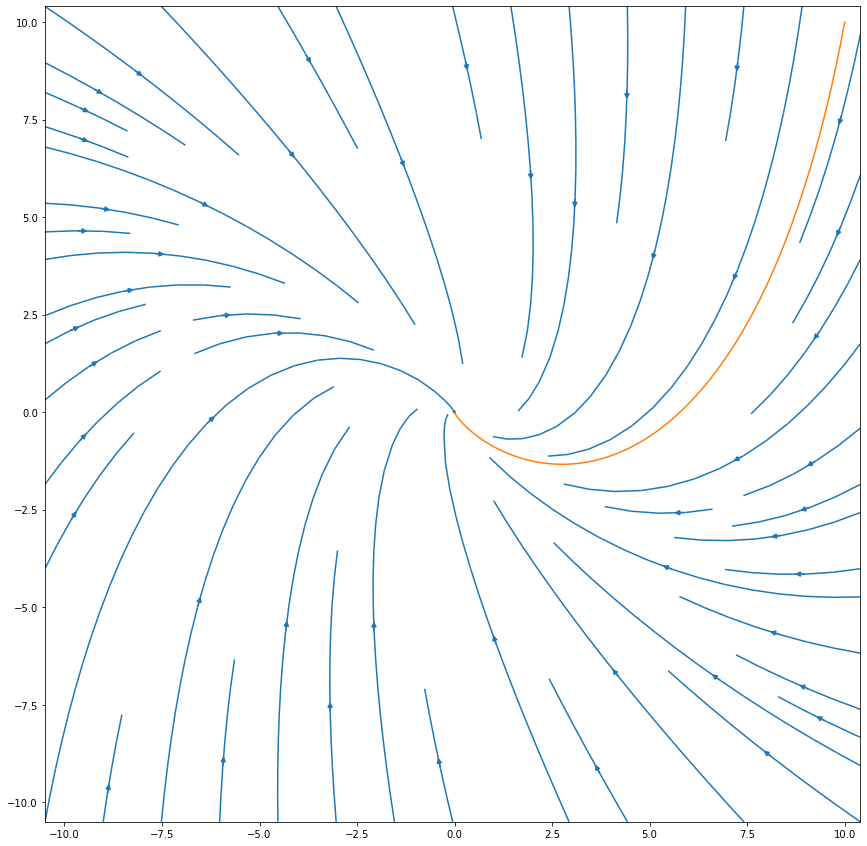

In [23]:
linear_vectorfield_x0 = np.loadtxt("./data/linear_vectorfield_data_x0.txt")
linear_vectorfield_x1 = np.loadtxt("./data/linear_vectorfield_data_x1.txt")

dt_list = np.arange(0.05, 0.5, 0.05)

err_list = []
for dt in dt_list:
    Y, X = np.mgrid[-10.5:10.5:0.1, -10.5:10.5:0.1]

    v_k = (linear_vectorfield_x1 - linear_vectorfield_x0) / dt
    A_t, residual = np.linalg.lstsq(linear_vectorfield_x0, v_k, rcond=1e-5)[:2]

    f_hat = np.zeros(linear_vectorfield_x0.shape)
    for i in range(linear_vectorfield_x0.shape[0]):
        f_hat[i, :] = solve_ivp(lambda t, x: x @ A_t, t_span=(0.0, 0.1), t_eval=[0.1], y0=linear_vectorfield_x0[i, :]).y.T

    err_list.append(np.mean(np.sum((linear_vectorfield_x1 - f_hat)**2, axis=-1)))

min_idx = np.argmin(np.array(err_list))
dt = dt_list[min_idx]
initial_location = [10, 10]
sol = solve_ivp(lambda t, x: x @ A_t, t_span=(0, 100), t_eval=np.arange(0, 100, dt), y0=initial_location)

plot_phase_portrait(A_t.T, X, Y, "", sol);